In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from pandas.plotting import bootstrap_plot

In [2]:
df = pd.read_csv("All_Data.csv")

In [3]:
df.drop(columns = ["Low latitude (deg)", "Low longitude (deg)", "High latitude (deg)", "High longitude (deg)", 
                   "Average speed (m/s)","Max speed (m/s)","Min speed (m/s)","Average weight (kg)", "Max weight (kg)", 
                   "Min weight (kg)", "Guided breathing duration (ms)", "Strength training duration (ms)", 
                   "Rowing machine duration (ms)", "Biking duration (ms)", "CrossFit duration (ms)" ], inplace= True)

In [4]:
#df.fillna(value=0, inplace=True)

In [5]:
df['DateTime'] = df['Date'] + ' ' + df['Start time']
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.index = df['DateTime']
df.drop(columns = 'DateTime', inplace = True)
df = df.tshift(9, 'H')
df.index = df.index.tz_localize(None)

In [6]:
df['Day'] = df.index.day_name()
df['Hour'] = df.index.hour
df = df['2019']
df

,Start time,End time,Calories (kcal),Distance (m),Step count,Move Minutes count,Inactive duration (ms),Walking duration (ms),Date,Running duration (ms),Day,Hour
DateTime,,,,,,,,,,,,
2019-01-01 00:00:00,15:00:00.000Z,15:15:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 00:15:00,15:15:00.000Z,15:30:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 00:30:00,15:30:00.000Z,15:45:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 00:45:00,15:45:00.000Z,16:00:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 01:00:00,16:00:00.000Z,16:15:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,13:45:00.000Z,14:00:00.000Z,49.646296,565.945238,796.0,9.0,252038.0,523961.0,2019-12-31,NaN,Tuesday,22
2019-12-31 23:00:00,14:00:00.000Z,14:15:00.000Z,72.824196,929.576180,1328.0,15.0,NaN,900000.0,2019-12-31,NaN,Tuesday,23
2019-12-31 23:15:00,14:15:00.000Z,14:30:00.000Z,46.181592,387.798776,562.0,8.0,311029.0,467749.0,2019-12-31,NaN,Tuesday,23


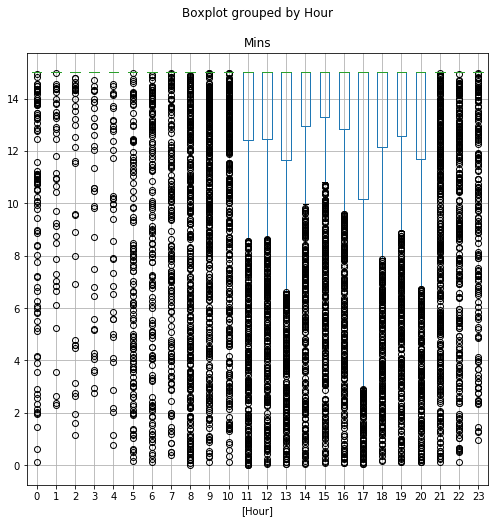

In [7]:
df['Mins'] = df['Inactive duration (ms)'].apply(lambda x: x/(1000*60))
df[['Mins', 'Hour']].boxplot(by='Hour', figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A00155988>]],
      dtype=object)

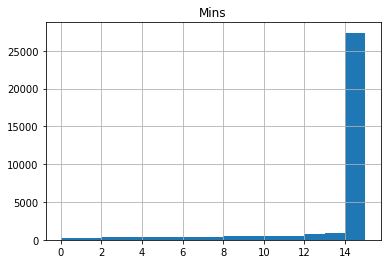

In [8]:
df.hist(column='Mins', bins=15)

In [9]:
df['Mins'].describe()

count    33833.000000
mean        13.717759
std          3.161424
min          0.002050
25%         15.000000
50%         15.000000
75%         15.000000
max         15.000000
Name: Mins, dtype: float64

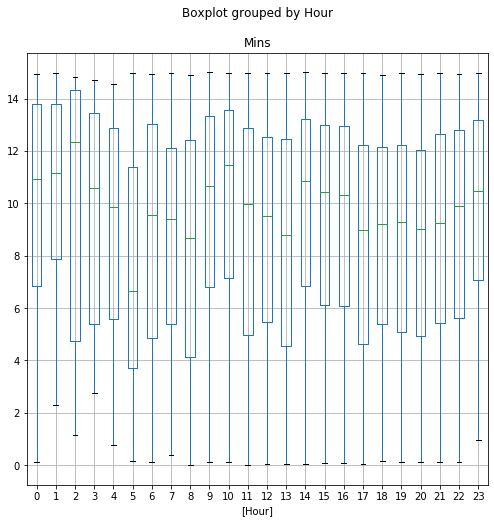

In [10]:
#df_trimmed = df[(df['Mins']<15) & (df['Mins']>1)]
df_trimmed = df[(df['Mins']<15)]
df_trimmed[['Mins', 'Hour']].boxplot(by='Hour', figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A0362DE48>]],
      dtype=object)

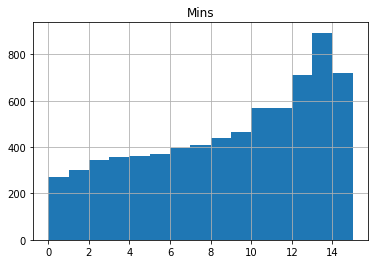

In [11]:
df_trimmed.hist(column='Mins', bins=15)

In [12]:
df_trimmed['Mins'].describe()

count    7169.000000
mean        8.948660
std         4.278986
min         0.002050
25%         5.462133
50%         9.761167
75%        12.829500
max        14.998117
Name: Mins, dtype: float64

In [13]:
df_top = df[(df['Mins']>=15)]
df_top['Mins'].describe()

count    26664.0
mean        15.0
std          0.0
min         15.0
25%         15.0
50%         15.0
75%         15.0
max         15.0
Name: Mins, dtype: float64

In [14]:
df_bottom = df[(df['Mins']<=1)]
df_bottom['Mins'].describe()

count    271.000000
mean       0.507391
std        0.285463
min        0.002050
25%        0.272792
50%        0.489367
75%        0.754142
max        1.000000
Name: Mins, dtype: float64

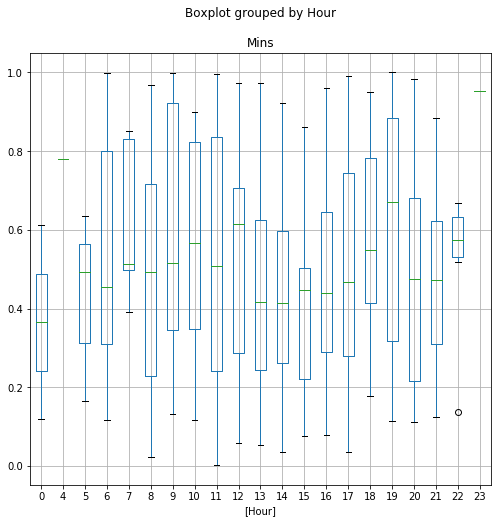

In [15]:
df_bottom[['Mins', 'Hour']].boxplot(by='Hour', figsize=(8,8))

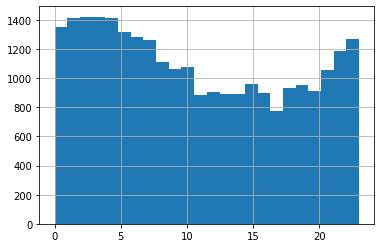

In [16]:
df_top['Hour'].hist(bins=24)

In [17]:
#### Your sum agg function is adding all the hours together


df_hour = df_trimmed.resample('H').apply(sum)
df_day = df_trimmed.resample('D').apply(sum)
df_week = df_trimmed.resample('W').apply(sum)
df_month = df_trimmed.resample('M').apply(sum)

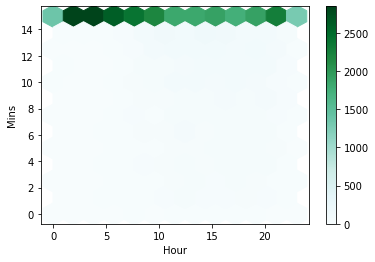

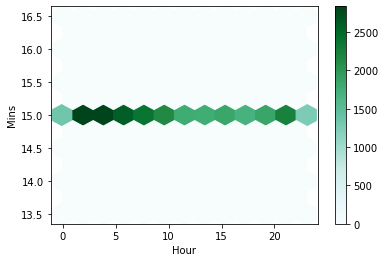

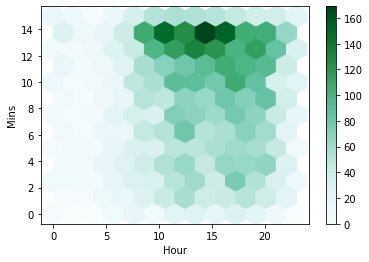

In [205]:
df.plot.hexbin(x='Hour', y='Mins', gridsize=12, sharex=False)
df_top.plot.hexbin(x='Hour', y='Mins', gridsize=12, sharex=False)
df_trimmed.plot.hexbin(x='Hour', y='Mins', gridsize=12, sharex=False)

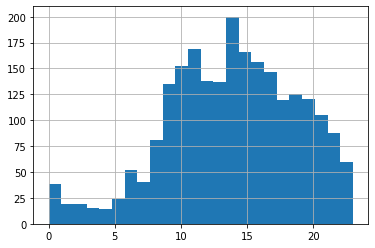

In [192]:
df_trimmed[df_trimmed['Mins'] > 12]['Hour'].hist(bins=24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A0F730D08>,
      dtype=object)

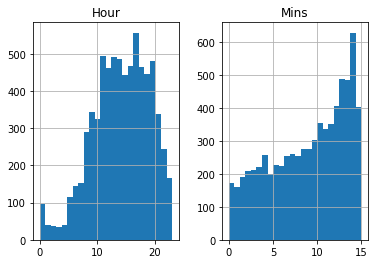

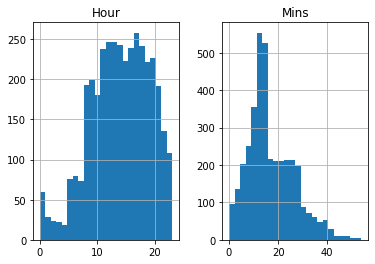

In [178]:
#### Try to make a heatmap
#### What is going on here!?!

import seaborn as sns

df_heatmap = df_trimmed[['Mins', 'Hour']]
#df_heatmap['Mins'] = round(df_heatmap['Mins'],2)
df_heatmap = df_heatmap.resample('H').agg({'Mins': 'sum', 'Hour': 'mean'})
#df_heatmap = df_heatmap.resample('H').sum()
df_heatmap = df_heatmap.dropna()
df_trimmed[['Mins', 'Hour']].hist(bins=24)
df_heatmap.hist(bins=24)
#df_heatmap.describe()
#df_trimmed.head(50)

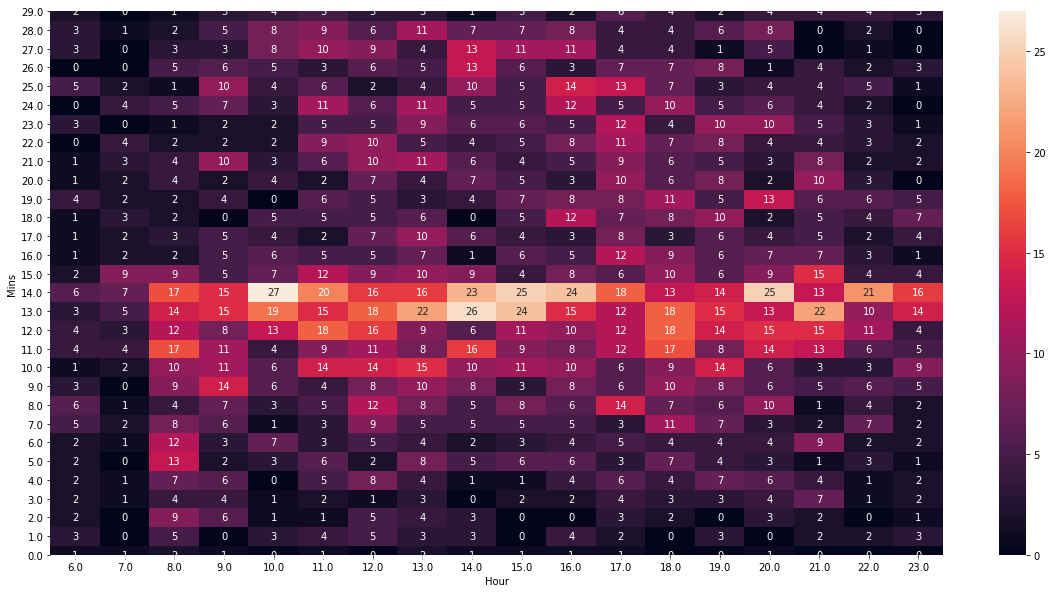

In [182]:
import seaborn as sns
#df_heatmap['Mins'] = round(df_heatmap['Mins'])
#df_heatmap = pd.crosstab(df_heatmap['Mins'], df_heatmap['Hour'])
#df_heatmap = df_heatmap[df_heatmap.index<30]
#df_heatmap.drop(columns=[0, 1, 2, 3 ,4, 5], inplace = True)
plt.subplots(figsize=(20,10)) 
ax = sns.heatmap(df_heatmap, annot=True)
ax.invert_yaxis()

#df_heatmap.describe()

#This does not agree with analysis above!!!



# Break Time -- Below will look into using different sample sizes

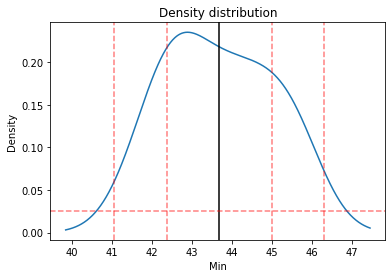

In [212]:
ax = df_test['Mins'].resample('M').mean().plot.kde()
ax.set_xlabel('Min')
ax.title.set_text('Density distribution')
ax.axvline(43.687685, color ='black')
ax.axvline(43.687685 + 1.316153, color ='r' , linestyle = '--', alpha =.5)
ax.axvline(43.687685 - 1.316153, color ='r' , linestyle = '--', alpha =.5)
ax.axvline(43.687685 + (1.316153 * 2), color ='r' , linestyle = '--', alpha =.5)
ax.axvline(43.687685 - (1.316153 * 2), color ='r' , linestyle = '--', alpha =.5)
ax.axhline(.025, color ='r', linestyle ='--', alpha =.5)

### ~95% data falls within 2 stds

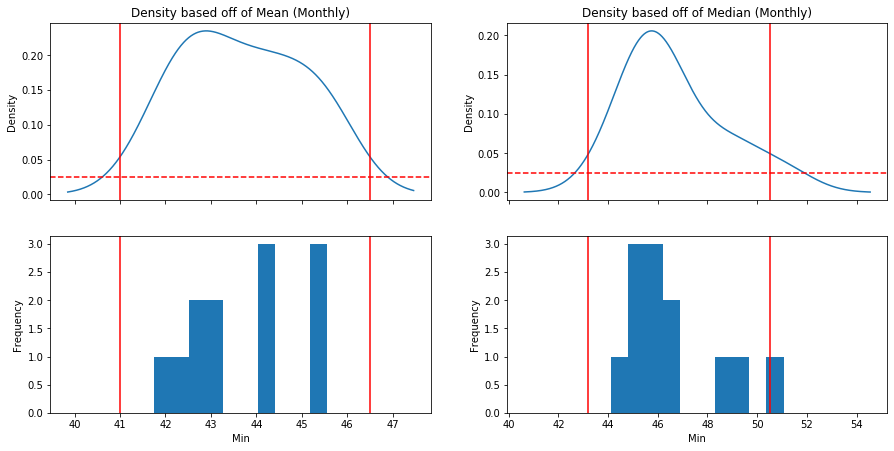

In [213]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(421)
ax = df_test['Mins'].resample('M').mean().plot.kde()
ax.axvline(41, color ='r')
ax.axvline(46.5, color ='r')
ax.axhline(.025, color ='r', linestyle ='--')
ax.title.set_text('Density based off of Mean (Monthly)')
#ax.set_xlabel('Min')

ax2 = fig.add_subplot(422)
ax2 = df_test['Mins'].resample('M').median().plot.kde()
ax2.axvline(43.2, color ='r')
ax2.axvline(50.5, color ='r')
ax2.axhline(.025, color ='r', linestyle ='--')
ax2.title.set_text('Density based off of Median (Monthly)')
#ax2.set_xlabel('Min')

ax3 = fig.add_subplot(423, sharex=ax)
ax3 = df_test['Mins'].resample('M').mean().plot.hist()
ax3.axvline(41, color ='r')
ax3.axvline(46.5, color ='r')
ax3.set_xlabel('Min')

ax4 = fig.add_subplot(424, sharex=ax2)
ax4 = df_test['Mins'].resample('M').median().plot.hist()
ax4.axvline(43.2, color ='r')
ax4.axvline(50.5, color ='r')
ax4.set_xlabel('Min')

plt.show()


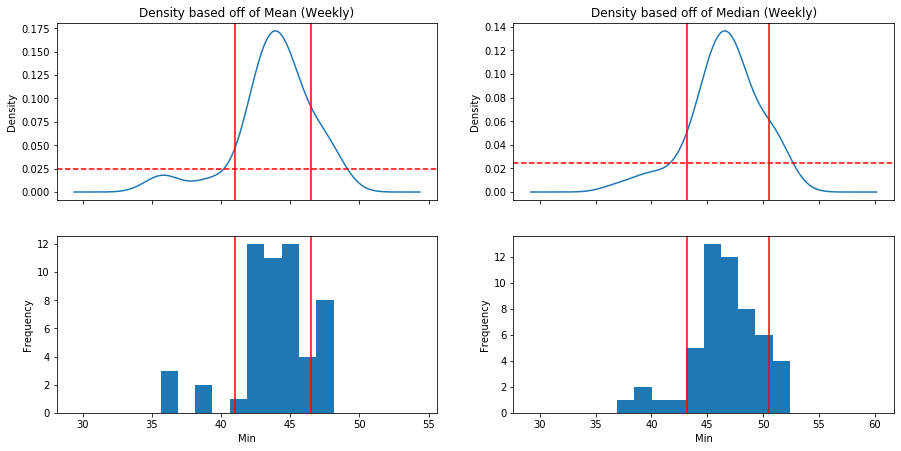

In [214]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(421)
ax = df_test['Mins'].resample('W').mean().plot.kde()
ax.axvline(41, color ='r')
ax.axvline(46.5, color ='r')
ax.axhline(.025, color ='r', linestyle ='--')
ax.title.set_text('Density based off of Mean (Weekly)')
#ax.set_xlabel('Min')

ax2 = fig.add_subplot(422)
ax2 = df_test['Mins'].resample('W').median().plot.kde()
ax2.axvline(43.2, color ='r')
ax2.axvline(50.5, color ='r')
ax2.axhline(.025, color ='r', linestyle ='--')
ax2.title.set_text('Density based off of Median (Weekly)')
#ax2.set_xlabel('Min')

ax3 = fig.add_subplot(423, sharex=ax)
ax3 = df_test['Mins'].resample('W').mean().plot.hist()
ax3.axvline(41, color ='r')
ax3.axvline(46.5, color ='r')
ax3.set_xlabel('Min')

ax4 = fig.add_subplot(424, sharex=ax2)
ax4 = df_test['Mins'].resample('W').median().plot.hist()
ax4.axvline(43.2, color ='r')
ax4.axvline(50.5, color ='r')
ax4.set_xlabel('Min')

plt.show()


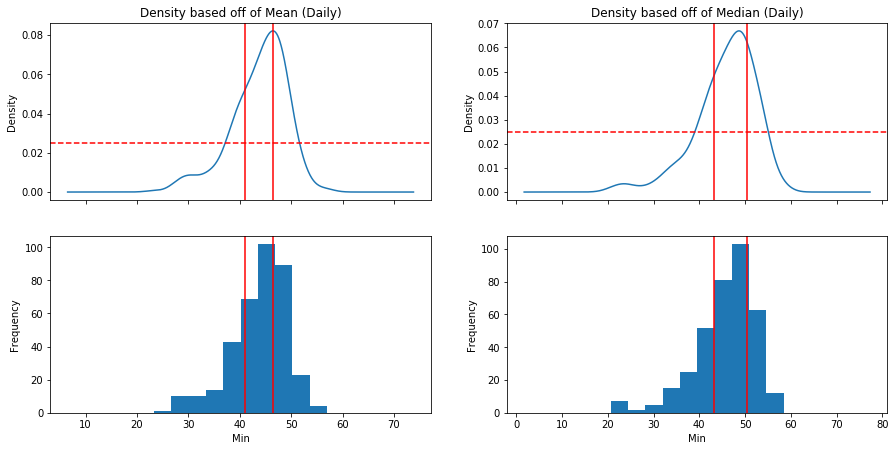

In [215]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(421)
ax = df_test['Mins'].resample('D').mean().plot.kde()
ax.axvline(41, color ='r')
ax.axvline(46.5, color ='r')
ax.axhline(.025, color ='r', linestyle ='--')
ax.title.set_text('Density based off of Mean (Daily)')
#ax.set_xlabel('Min')

ax2 = fig.add_subplot(422)
ax2 = df_test['Mins'].resample('D').median().plot.kde()
ax2.axvline(43.2, color ='r')
ax2.axvline(50.5, color ='r')
ax2.axhline(.025, color ='r', linestyle ='--')
ax2.title.set_text('Density based off of Median (Daily)')
#ax2.set_xlabel('Min')

ax3 = fig.add_subplot(423, sharex=ax)
ax3 = df_test['Mins'].resample('D').mean().plot.hist()
ax3.axvline(41, color ='r')
ax3.axvline(46.5, color ='r')
ax3.set_xlabel('Min')

ax4 = fig.add_subplot(424, sharex=ax2)
ax4 = df_test['Mins'].resample('D').median().plot.hist()
ax4.axvline(43.2, color ='r')
ax4.axvline(50.5, color ='r')
ax4.set_xlabel('Min')

plt.show()


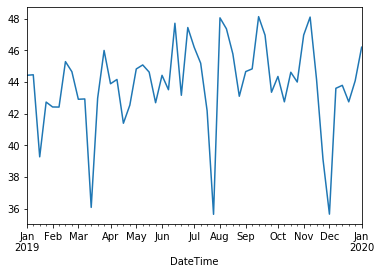

In [41]:
df_test['Mins'].resample('W').mean().plot()

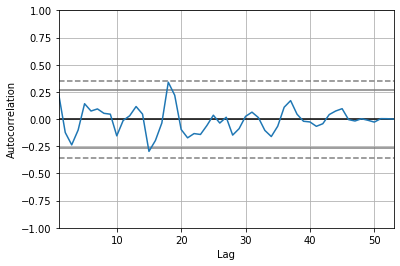

In [16]:
autocorrelation_plot(df_test['Mins'].resample('W').mean())

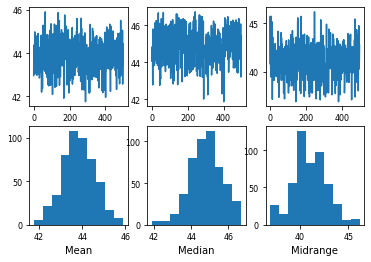

In [17]:
tempvar = bootstrap_plot(df_test['Mins'].resample('D').mean(), size=50, samples=500)

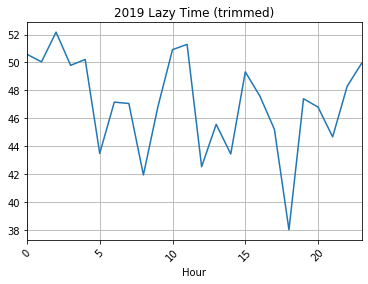

In [18]:
df_test.groupby('Hour')['Mins'].median().plot(rot=45, grid=True, title="2019 Lazy Time (trimmed)")

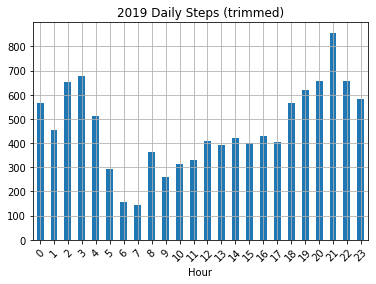

In [19]:
df_test.groupby('Hour')['Step count'].median().plot.bar(rot=45, grid=True, title="2019 Daily Steps (trimmed)")

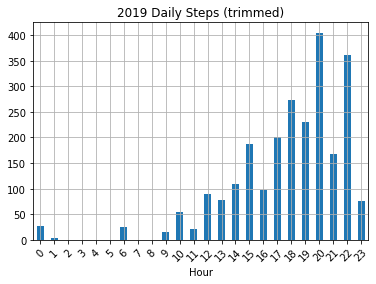

In [102]:
df_testframe = df['2019-2']
df_testframe.groupby('Hour')['Step count'].median().plot.bar(rot=45, grid=True, title="2019 Daily Steps (trimmed)")

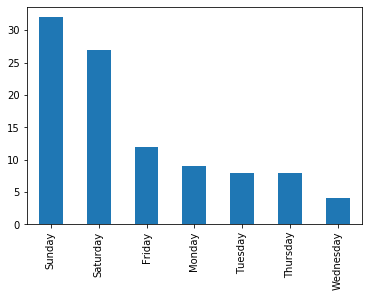

In [101]:
df_test['Day'][(df['Step count'] > 50) & (df['Hour'].between(1,4))].value_counts().plot.bar()
